In [2]:
import pandas as pd

data = pd.read_csv("ex2data1.txt", header=None, names=["Exam 1 Score", "Exam 2 Score", "Admitted"])
print(data.head())

   Exam 1 Score  Exam 2 Score  Admitted
0     34.623660     78.024693         0
1     30.286711     43.894998         0
2     35.847409     72.902198         0
3     60.182599     86.308552         1
4     79.032736     75.344376         1


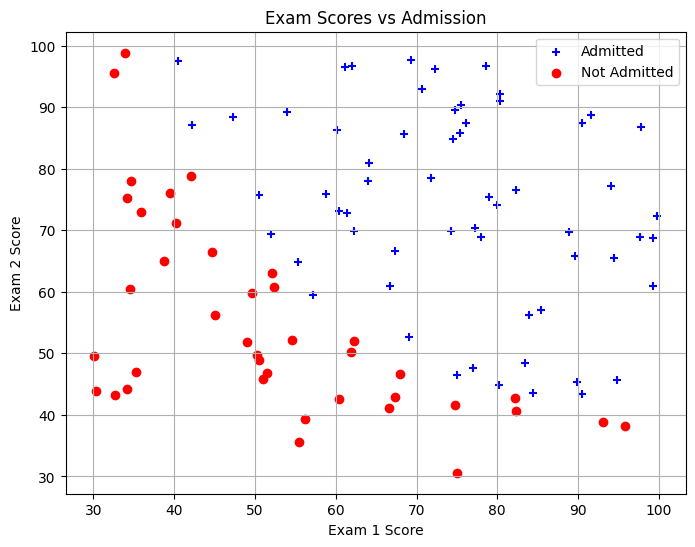

In [4]:
import matplotlib.pyplot as plt

# Separate the admitted and not admitted students
admitted = data[data['Admitted'] == 1]
not_admitted = data[data['Admitted'] == 0]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(admitted['Exam 1 Score'], admitted['Exam 2 Score'], c='blue', marker='+', label='Admitted')
plt.scatter(not_admitted['Exam 1 Score'], not_admitted['Exam 2 Score'], c='red', marker='o', label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Exam Scores vs Admission')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Split features (X) and target (y)
X = data[['Exam 1 Score', 'Exam 2 Score']]
y = data['Admitted']

# 2. Create a logistic regression model
model = LogisticRegression()

# 3. Fit the model to the data
model.fit(X, y)

# 4. Predict on training data
predictions = model.predict(X)

# 5. Evaluate the model
accuracy = accuracy_score(y, predictions)
report = classification_report(y, predictions)

# Print the results
print(f"Training Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

Training Accuracy: 89.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



Interpretation:
	•	🔹 Precision = How many selected items were relevant? (e.g., how many predicted “admitted” were actually admitted?)
	•	🔹 Recall = How many relevant items were selected? (e.g., how many actual admitted students were predicted correctly?)
	•	🔹 F1-score = Harmonic mean of precision and recall (balances both).

⸻

🔍 Summary:
	•	The model is slightly better at identifying admitted students (class 1) than not-admitted ones (class 0).
	•	Overall, it’s a strong baseline for logistic regression on this dataset.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features and target
X = data[['Exam 1 Score', 'Exam 2 Score']]
y = data['Admitted']

# Train the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

print("Predictions:\n", y_pred)
print(f"\nModel Accuracy on the dataset: {accuracy * 100:.2f}%")

Predictions:
 [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]

Model Accuracy on the dataset: 89.00%


Model Evaluation:

Interpret the result of logistic regression and the accuracy of your model.

A logistic regression model was built to predict whether a student gets admitted to a university based on two exam scores.

✅ Model Accuracy: 89.00%
	•	This means that out of 100 students, 89 were correctly classified (admitted vs not admitted).
	•	This is a strong result for a simple model on raw data with only two features.

Key Terms:

	•	Precision: When the model predicts “Admitted”, how often is it correct?

	•	Recall: How many of the truly admitted students did the model correctly identify?

	•	F1-Score: Balance between precision and recall — the higher, the better.

	•	Support: Number of actual samples in each class.


  📌 What This Means:
  
	•	The model performs slightly better on admitted students (class 1) than on not-admitted ones (class 0).
	•	It captures 92% of all admitted students correctly (high recall).
	•	Its decisions are also reliable when predicting admission (90% precision).

In [7]:
import pandas as pd

# Load the dataset
data2 = pd.read_csv('ex2data2.txt', header=None, names=['Test 1', 'Test 2', 'Admitted'])

# Display the first few rows
print(data2.head())

     Test 1   Test 2  Admitted
0  0.051267  0.69956         1
1 -0.092742  0.68494         1
2 -0.213710  0.69225         1
3 -0.375000  0.50219         1
4 -0.513250  0.46564         1


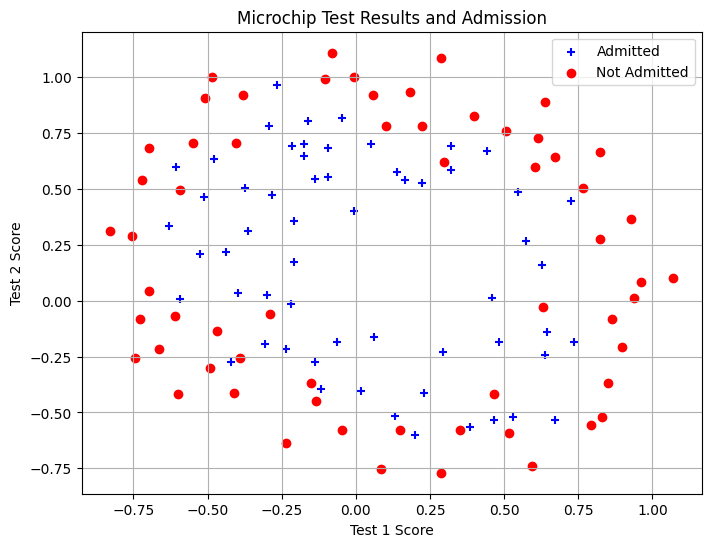

In [8]:
import matplotlib.pyplot as plt

# Separate the data
admitted = data2[data2['Admitted'] == 1]
not_admitted = data2[data2['Admitted'] == 0]

# Plot
plt.figure(figsize=(8,6))
plt.scatter(admitted['Test 1'], admitted['Test 2'], c='blue', marker='+', label='Admitted')
plt.scatter(not_admitted['Test 1'], not_admitted['Test 2'], c='red', marker='o', label='Not Admitted')
plt.xlabel('Test 1 Score')
plt.ylabel('Test 2 Score')
plt.title('Microchip Test Results and Admission')
plt.legend()
plt.grid(True)
plt.show()

🔍 Interpretation of the Plot:

	•	the two classes cannot be separated by a straight line.
	•	Instead, the data forms a non-linear boundary, like a circle or an ellipse.
	•	This is why we’ll need to use feature mapping (e.g., add polynomial terms) and apply regularization.

In [9]:
from sklearn.linear_model import LogisticRegression

# Create model with regularization
model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')  # 'C' is inverse of λ

In [10]:
import numpy as np

def map_features(x1, x2, degree=6):
    """
    Maps two input features to polynomial features up to the given degree.
    Example: x1, x2 → 1, x1, x2, x1^2, x1*x2, x2^2, ...
    """
    out = [np.ones(x1.shape[0])]
    for i in range(1, degree + 1):
        for j in range(i + 1):
            term = (x1 ** (i - j)) * (x2 ** j)
            out.append(term)
    return np.stack(out, axis=1)

In [11]:
import pandas as pd

# Load data
data = pd.read_csv('ex2data2.txt', header=None, names=['Test 1', 'Test 2', 'Admitted'])

# Extract features and labels
X = data[['Test 1', 'Test 2']]
y = data['Admitted']

# Map features
X_mapped = map_features(X['Test 1'].values, X['Test 2'].values)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train model with regularization
model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
model.fit(X_mapped, y)

# Predict & evaluate
y_pred = model.predict(X_mapped)
accuracy = accuracy_score(y, y_pred)

print(f"Training Accuracy: {accuracy * 100:.2f}%")

Training Accuracy: 83.05%


/tmp/ipython-input-13-1312552973.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = model.decision_function(mapped_features)
/tmp/ipython-input-13-1312552973.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = model.decision_function(mapped_features)
/tmp/ipython-input-13-1312552973.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = model.decision_function(mapped_features)
/tmp/ipython-input-13-1312552973.py:24: DeprecationWarning

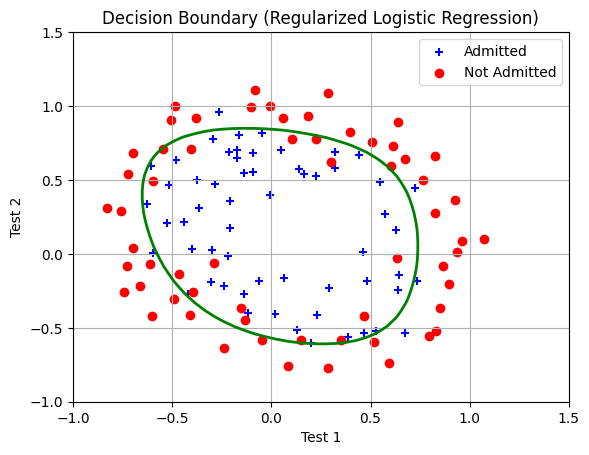

In [13]:
import matplotlib.pyplot as plt

# Plotting data
def plot_data(data):
    admitted = data[data['Admitted'] == 1]
    not_admitted = data[data['Admitted'] == 0]

    plt.scatter(admitted['Test 1'], admitted['Test 2'], c='blue', marker='+', label='Admitted')
    plt.scatter(not_admitted['Test 1'], not_admitted['Test 2'], c='red', marker='o', label='Not Admitted')
    plt.xlabel('Test 1')
    plt.ylabel('Test 2')
    plt.title('Decision Boundary (Regularized Logistic Regression)')
    plt.legend()

# Create a grid of values
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

# Evaluate z = θ^T φ(x) over the grid
for i in range(len(u)):
    for j in range(len(v)):
        mapped_features = map_features(np.array([u[i]]), np.array([v[j]]))
        z[i, j] = model.decision_function(mapped_features)

# Plot
plot_data(data)
plt.contour(u, v, z.T, levels=[0], linewidths=2, colors='green')  # Decision boundary where z=0
plt.grid(True)
plt.show()